In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import os

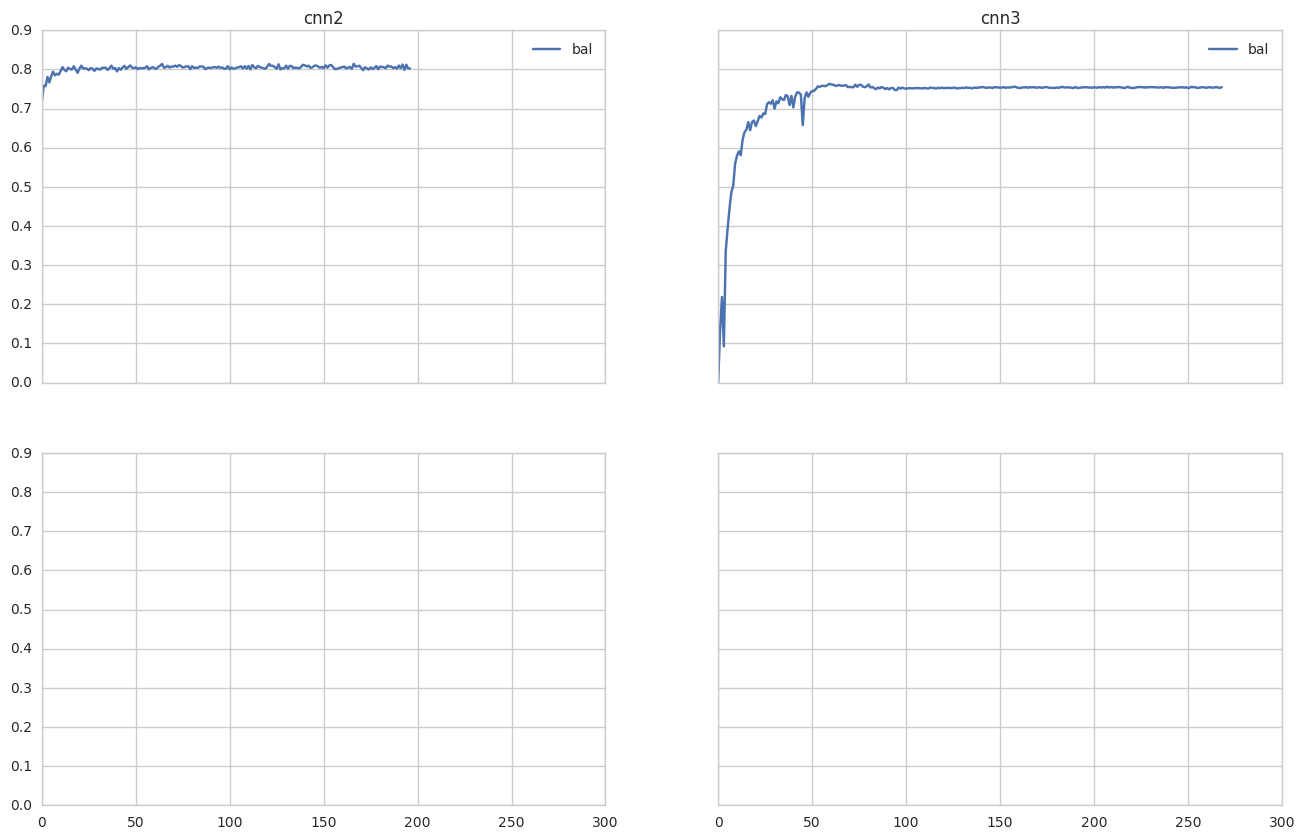

In [9]:
# # no 9mers_imbalanced due to the very poor results

# folders = ["gru_rand", "gru_wei", "gru_wei_b64"]

# models = {}
# approach = {}
# for fold in folders:
#     approach[fold] = {}
#     for subfold in os.listdir(fold):
#         if os.path.isdir(fold + subfold) and not subfold.startswith("."):
#             if subfold not in models:
#                 models[subfold] = {}
#             with open(fold + subfold + "/history.f1.txt") as inp:
#                 data = [float(x) for x in inp.readlines()]
#                 models[subfold][fold] = data
#                 approach[fold][subfold] = data

n_app = 3
n_models = 9

folders = ["gru_bal", "gru_wei", "gru_rand", "cnn_bal", "cnn2_bal", "dense_bal", "cnn3_bal", 
           "cnn4_wei", "cnnrnn_bal", "cnnrnn3_bal"]
folders = ["cnn2_bal", "cnn3_bal"]

history_files = ["f1"]


metrics = {x:{} for x in history_files}
for hs in history_files:
    models = {}
    approach = {}
    for fold in folders:
        if fold.split("_")[0] not in models:
            models[fold.split("_")[0]] = {}
        if fold.split("_")[1] not in approach:
            approach[fold.split("_")[1]] = {}
        with open(fold + "/history." + hs + ".txt") as inp:
            data = [float(x) for x in inp.readlines()]
            models[fold.split("_")[0]][fold.split("_")[1]] = data
            approach[fold.split("_")[1]][fold.split("_")[0]] = data
    metrics[hs] = (models, approach)
    
    
rows = 2
cols = 2
f, ax = plt.subplots(rows, cols, figsize=(16, 10), sharey=True, sharex=True)
for i, key in enumerate(models):
    for subkey in models[key]:
        r, c = i // rows, i%cols
        ax[r,c].set_title(key)
        ax[r,c].plot(range(len(models[key][subkey])), models[key][subkey], label = subkey)
        ax[r,c].legend()

In [27]:
max(models["cnn3"]["bal"])

0.783303464755

In [1]:
# import os
# os.environ["THEANO_FLAGS"] = "lib.cnmem=0.2"
# from keras.models import load_model

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 20.0% of memory, cuDNN 5110)


In [2]:
# model = load_model("cnn3_bal/model.1.hdf5")

In [12]:
# import sys
# import numpy as np
# from numpy.linalg import norm
# import pandas as pd
# import gensim
# import scipy.stats as stats 

# sys.setrecursionlimit(10000)


# BIND_THR = 1 - np.log(500) / np.log(50000)


# VERBOSE=2
# BATCH_SIZE=32
# EPOCHS=300
# POOL_SIZE=2

# #theano.config.floatX="float32"
# #theano.config.device="gpu1"
# #theano.config.lib.cnmem="1."

# def read_df(filepath):
#     df = pd.read_table(filepath, sep="\t")

#     df.loc[df.meas > 50000, "meas"] = 50000
#     df.meas = 1 - np.log(df.meas) / np.log(50000)
    
#     df.mhc = list(map(lambda x: x.replace("-", ""), df.mhc))
#     df.mhc = list(map(lambda x: x.replace(":", ""), df.mhc))
#     df.mhc = list(map(lambda x: x.replace("*", ""), df.mhc))

#     df.loc[df.mhc == "HLAA1", "mhc"] = "HLAA0101"
#     df.loc[df.mhc == "HLAA11", "mhc"] = "HLAA0101"
#     df.loc[df.mhc == "HLAA2", "mhc"] = "HLAA0201"
#     df.loc[df.mhc == "HLAA3", "mhc"] = "HLAA0319"
#     df.loc[df.mhc == "HLAA3/11", "mhc"] = "HLAA0319"
#     df.loc[df.mhc == "HLAA26", "mhc"] = "HLAA2602"
#     df.loc[df.mhc == "HLAA24", "mhc"] = "HLAA2403"

#     df.loc[df.mhc == "HLAB44", "mhc"] = "HLAB4402"
#     df.loc[df.mhc == "HLAB51", "mhc"] = "HLAB5101"
#     df.loc[df.mhc == "HLAB7", "mhc"] = "HLAB0702"
#     df.loc[df.mhc == "HLAB27", "mhc"] = "HLAB2720"
#     df.loc[df.mhc == "HLAB8", "mhc"] = "HLAB0801"

#     df.loc[df.mhc == "HLACw1", "mhc"] = "HLAC0401"
#     df.loc[df.mhc == "HLACw4", "mhc"] = "HLAC0401"

#     df = df.loc[df.mhc != "HLAB60", :]
    
#     return df


# w2v_model = gensim.models.Word2Vec.load("../w2v_models/up9mers_size_10_window_3.pkl")

# def vectorize_mhc(seq_vec, name_vec, max_len, chars):
#     res = {}
#     for i, seq in enumerate(seq_vec):
#         # res[name_vec[i]] = np.zeros((max_len, len(chars)), dtype=np.bool)
#         res[name_vec[i]] = np.zeros((max_len, 10), dtype=np.float32)
#         for row, char in enumerate(seq):
#             # res[name_vec[i]][row, char_indices[char]] = 1
#             res[name_vec[i]][row, :] = w2v_model.wv[char] / norm(w2v_model.wv[char])
#     return res


# def vectorize_xy(seq_vec, affin_vec, max_len, chars):
#     # X = np.zeros((len(seq_vec), max_len, len(chars)), dtype=np.bool)
#     X = np.zeros((len(seq_vec), max_len, 10), dtype=np.float32)
#     y = affin_vec
#     for i, seq in enumerate(seq_vec):
#         for row, char in enumerate(seq):
#             # X[i, row, char_indices[char]] = 1
#             X[i, row, :] = w2v_model.wv[char] / norm(w2v_model.wv[char])
#     return X, y.reshape(len(seq_vec), 1)

    
# #####################
# # Prepare the chars #
# #####################
# chars = ["A", "L", "R", 'K', 'N', 'M', 'D', 'F', 'C', 'P', 'Q', 'S', 'E', 'T', 'G', 'W', 'H', 'Y', 'I', 'V']
# print('total chars:', len(chars))
# print(chars)
# char_indices = dict((c, i) for i, c in enumerate(chars))
# indices_char = dict((i, c) for i, c in enumerate(chars))


# #####################
# # Load the MHC data #
# #####################
# print("Load MHC")
# # mhc_df = pd.read_csv("data/mhc_seq_imghtla.csv")
# mhc_df = pd.read_csv("../data/mhc_nature.csv")
# MAX_MHC_LEN = max([len(x) for x in mhc_df["pseudo"]])
# X_mhc = vectorize_mhc(mhc_df["pseudo"], mhc_df["mhc"], MAX_MHC_LEN, chars)


# ##########################
# # Load the training data #
# ##########################
# print("Load train")
# df = read_df("../data/bdata.2009.tsv")
# human_df = df.loc[df.species == "human", :]
# human_df = human_df.loc[human_df.peptide_length == 9, :]

# MAX_PEP_LEN = max([len(x) for x in human_df["sequence"]])
# X_pep_train, y_train = vectorize_xy(human_df["sequence"], human_df["meas"], MAX_PEP_LEN, chars)
# # X_mhc_train = np.zeros((X_pep_train.shape[0], MAX_MHC_LEN, len(chars)), dtype=np.bool)
# X_mhc_train = np.zeros((X_pep_train.shape[0], MAX_MHC_LEN, 10), dtype=np.float32)
# for i, mhc in enumerate(human_df["mhc"]):
#     X_mhc_train[i,:,:] = X_mhc[mhc]
# print(X_pep_train.shape)
# print(X_mhc_train.shape)

# indices_strong = np.nonzero(np.array(y_train >= BIND_THR))[0]
# indices_weak   = np.nonzero(np.array(y_train < BIND_THR))[0]
# print("indices shapes:")
# print(indices_strong.shape)
# print(indices_weak.shape)
# assert(indices_strong.shape[0] + indices_weak.shape[0] == X_pep_train.shape[0])

# _, mhc_unique_indices = np.unique(mhc_df["pseudo"], return_index=True)
# # X_mhc_unique = np.zeros((mhc_unique_indices.shape[0], MAX_MHC_LEN, len(chars)), dtype=np.bool)
# X_mhc_unique = np.zeros((mhc_unique_indices.shape[0], MAX_MHC_LEN, 10), dtype=np.float32)
# for i, j in enumerate(mhc_unique_indices):
#     X_mhc_unique[i,:,:] = X_mhc[mhc_df["mhc"].loc[j]]
    
# weights_train = np.exp(stats.beta.pdf(y_train, a=3.75, b=5))


# ####################
# # Load the CV data #
# ####################
# print("Load CV")
# df = read_df("../data/blind.tsv")
# human_df = df.loc[df.species == "human", :]
# human_df = human_df.loc[human_df.peptide_length == 9, :]

# X_pep_test, y_test = vectorize_xy(human_df["sequence"], human_df["meas"], MAX_PEP_LEN, chars)
# # X_mhc_test = np.zeros((X_pep_test.shape[0], MAX_MHC_LEN, len(chars)), dtype=np.bool)
# X_mhc_test = np.zeros((X_pep_test.shape[0], MAX_MHC_LEN, 10), dtype=np.float32)
# for i, mhc in enumerate(human_df["mhc"]):
#     X_mhc_test[i,:,:] = X_mhc[mhc]
# print(X_pep_test.shape)
# print(X_mhc_test.shape)

total chars: 20
['A', 'L', 'R', 'K', 'N', 'M', 'D', 'F', 'C', 'P', 'Q', 'S', 'E', 'T', 'G', 'W', 'H', 'Y', 'I', 'V']
Load MHC
Load train
(90963, 9, 10)
(90963, 48, 10)
indices shapes:
(20795,)
(70168,)
Load CV
(20425, 9, 10)
(20425, 48, 10)


In [17]:
# pred = model.predict([X_mhc_test, X_pep_test])
# pred

array([[ 0.00975865],
       [ 0.12295182],
       [ 0.06623472],
       ..., 
       [ 0.08519685],
       [ 0.55519915],
       [ 0.62032205]], dtype=float32)

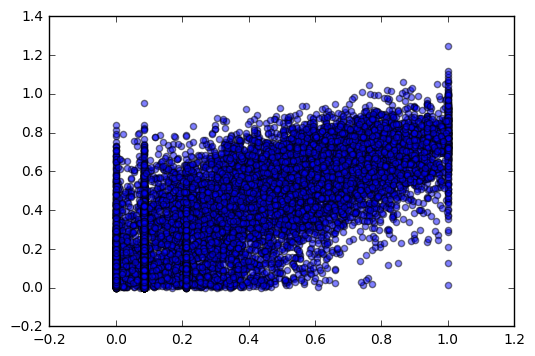

In [22]:
# %matplotlib inline

# import matplotlib.pyplot as plt

# plt.scatter(y_test, pred, alpha=.5)

In [23]:
pred2 = model.predict([X_mhc_train, X_pep_train])
pred2

array([[ 0.27153561],
       [ 0.46748468],
       [ 0.51999617],
       ..., 
       [ 0.60410243],
       [ 0.62447429],
       [ 0.17798361]], dtype=float32)

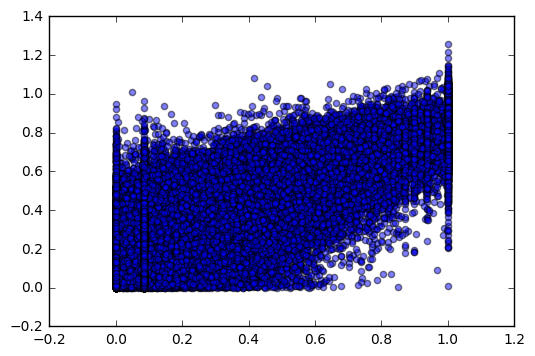

In [24]:
# plt.scatter(y_train, pred2, alpha=.5)